In [176]:
import tensorflow as tf
import torch

# check if GPU is being used
print("GPU Status: ", end = '')
if len(tf.config.list_physical_devices('GPU')) != 0: print("Active")
else: print("Inactive")

GPU Status: Active


In [177]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
from tensorflow import keras

#tf version should be 2.5 or higher
tf.__version__

'2.10.1'

In [178]:
#get data
(train_images, train_labels), (test_images, test_labels) = \
      keras.datasets.mnist.load_data()

In [179]:
#scale model
train_images = train_images / 255.0
test_images = test_images / 255.0

In [180]:
#reshape inputs for CNN layers
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [182]:
# CNN MODEL
#  - Notes - 
# Total Filters (Features) = 108
# Increased stride resolution
# Added an additional conv2d layer
# Regularization Techniques Used:
#   1) Batch Normalization (scale = False due to relu)
#   2) Dropout (decreased to 20% due to batch normalization)

model = keras.Sequential([
    keras.layers.Conv2D(kernel_size = 3, filters = 12, use_bias = False, padding = 'same', input_shape = (28, 28, 1)),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 24, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 32, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 32, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Flatten(),

    keras.layers.Dense(200, use_bias = False),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax')
])

In [184]:
# NEW MODEL COMPILE
#  - Notes - 
# Changed optimizer to adam to maintain momentum
model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [186]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0914 - accuracy: 0.9721 - val_loss: 0.0382 - val_accuracy: 0.9882
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0285 - val_accuracy: 0.9904
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0224 - val_accuracy: 0.9920
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0212 - val_accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0214 - val_accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0170 - val_accuracy: 0.9938
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0230 - val_ac

In [187]:
#evaluate
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.9951

Test accuracy: 0.9951000213623047


In [188]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

1/1 [==============================] - 0s 61ms/step


In [189]:
#Raw predictions
predictions

array([[5.4162874e-10, 3.4686565e-08, 1.3198250e-07, 7.7624918e-08,
        7.9570287e-07, 3.8010310e-08, 2.8723085e-10, 9.9998164e-01,
        2.0714543e-08, 1.7256418e-05],
       [1.6630614e-10, 1.5130314e-09, 1.0000000e+00, 3.3644698e-11,
        5.3398991e-12, 2.2733591e-15, 1.6685277e-08, 1.9896244e-12,
        1.3364219e-10, 7.0169731e-11],
       [8.6435148e-10, 9.9999988e-01, 7.4699874e-10, 3.3686560e-11,
        1.3375426e-08, 7.1527806e-10, 3.2060208e-09, 1.4781483e-07,
        4.6895328e-09, 2.9486361e-11],
       [9.9999750e-01, 2.1272151e-11, 2.5384769e-10, 1.3045244e-10,
        1.2048639e-11, 1.5776448e-09, 1.9559511e-06, 4.8595641e-12,
        5.5108302e-07, 4.1150380e-10],
       [2.5693778e-08, 1.7703212e-11, 5.9526363e-11, 1.0517499e-10,
        9.9991941e-01, 2.2414519e-09, 1.0472784e-09, 2.6176826e-11,
        6.2503922e-09, 8.0589416e-05]], dtype=float32)

In [190]:
# Print our model's predictions
print(np.argmax(predictions, axis=1))

[7 2 1 0 4]


In [191]:
# Check our predictions against the ground truths
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]


### (NEW) Evaluate the model

313/313 - 1s - loss: 0.0136 - accuracy: 0.9951 - 889ms/epoch - 3ms/step


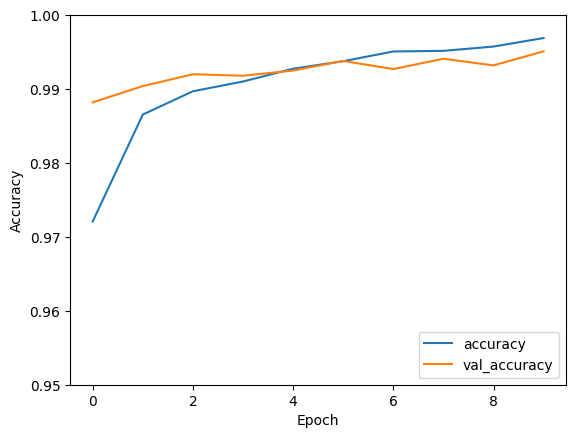

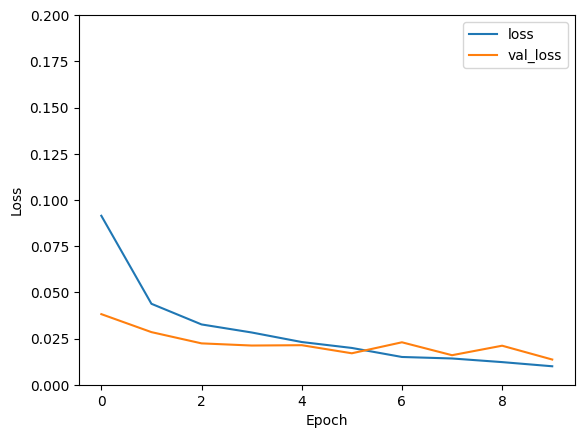

In [192]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1])
plt.legend(loc='lower right')

# Included loss to measure overfitting
plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)